# EDA on Haberman DataSet

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Loading the dataset using panda

haber = pd.read_csv('dataset\haberman.csv')
haber.columns
# Since columns name doesn't exist in this dataset, so adding same

haber.columns = ['Age','year','node_detected','survival']
haber.columns

Index(['Age', 'year', 'node_detected', 'survival'], dtype='object')

In [32]:
print(haber.shape)
print(haber['survival'].value_counts())

#haber['survival'] = haber['survival'].map({1:'yes',2:'no'})
#haber['survival'] = haber['survival'].astype('int64')

print(haber.head())
print('\n',haber.info())

(305, 4)
1    224
2     81
Name: survival, dtype: int64
   Age  year  node_detected  survival
0   30    62              3         1
1   30    65              0         1
2   31    59              2         1
3   31    65              4         1
4   33    58             10         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            305 non-null    int64
 1   year           305 non-null    int64
 2   node_detected  305 non-null    int64
 3   survival       305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB

 None


In [33]:
haber.describe()

# Age is between 30 to 83 and median is at 52

,Age,year,node_detected,survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 2D Plotting


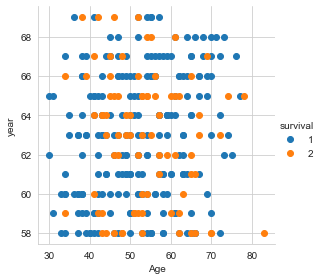

In [34]:
sn.set_style('whitegrid')
sn.FacetGrid(haber,hue='survival',height=4).map(plt.scatter,'Age','year').add_legend()

plt.show()

# we can't classify the label based on above data.

# Pair Plot

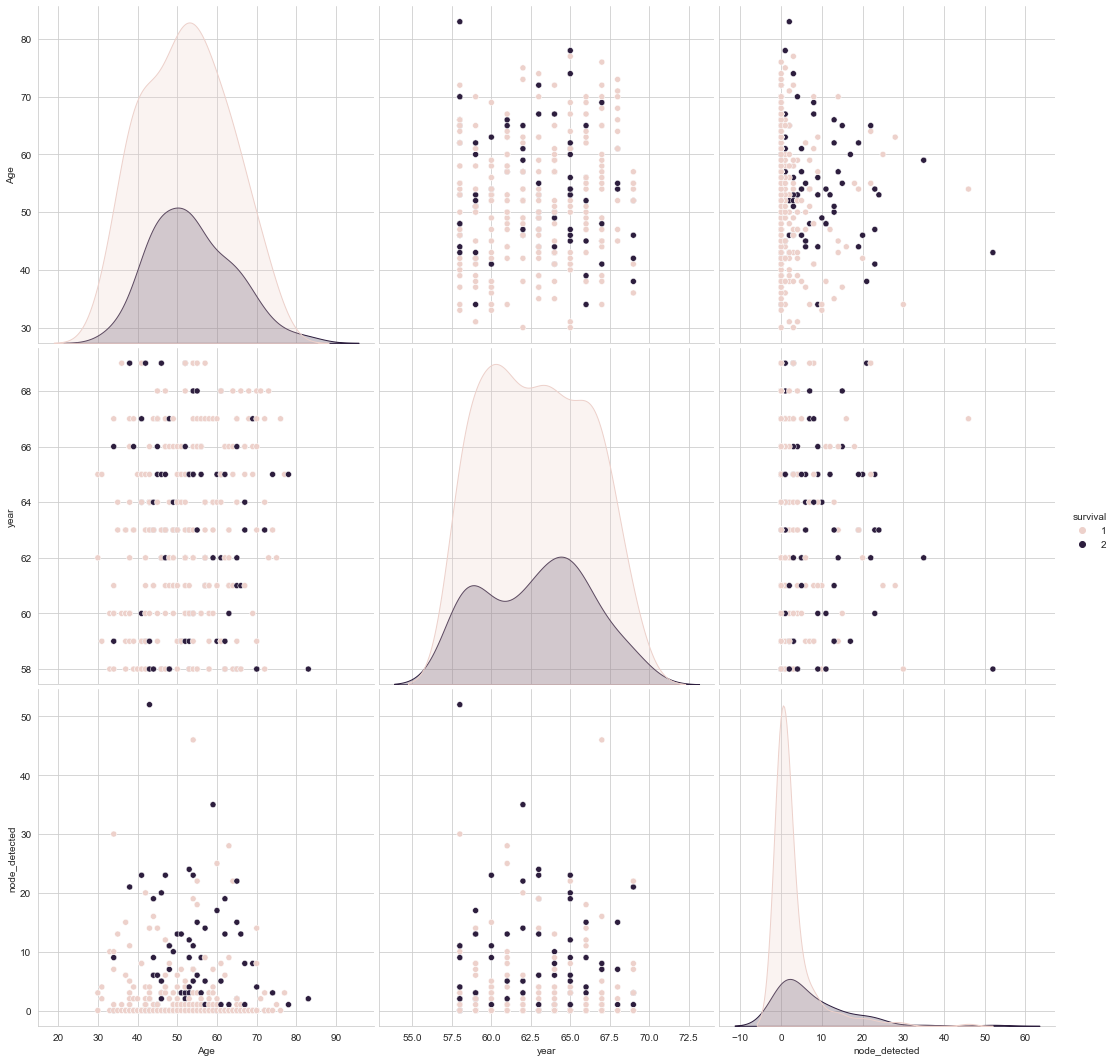

In [35]:
sn.set_style('whitegrid')
sn.pairplot(haber,hue='survival',height=5)

plt.show()

# Using the pair plot also, we can't have distinguish the survival status 

# Univariate analysis 

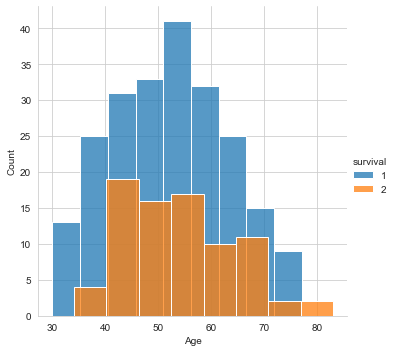

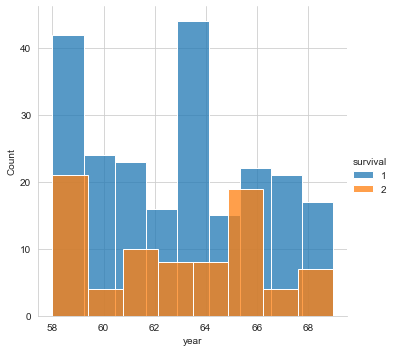

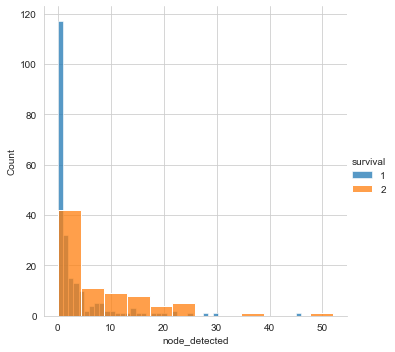

In [41]:
# pDF showing for all 3 dependent variable
# PDf is the probability that the variable takes a value x (smoothed version of histogram)

for idx,feature in enumerate(list(haber.columns)[:-1]):
    #print(idx,feature)
    sn.FacetGrid(haber,hue='survival',height=5).map(sn.histplot,feature).add_legend()
    plt.show()


********* Age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]
********* node_detected *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1.        ]


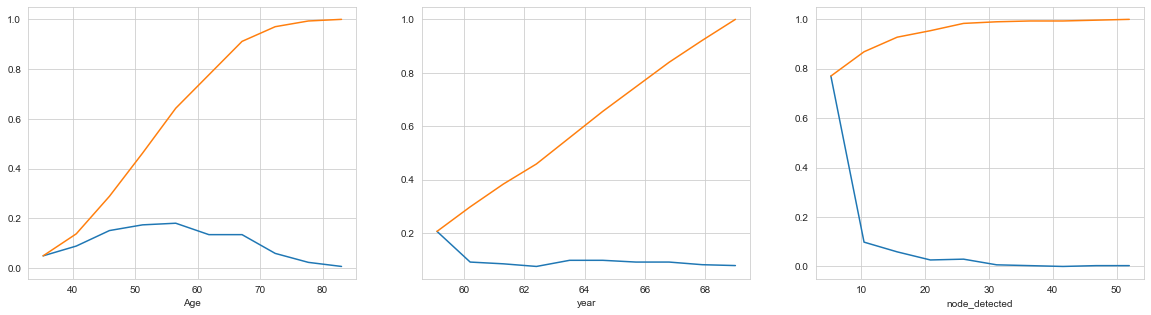

In [42]:
# CDF showing how much data is less than or equal to at that particular value x

plt.figure(figsize=(20,5))
for idx,feature in enumerate(list(haber.columns)[:-1]):
    #print(idx,feature)
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(haber[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)


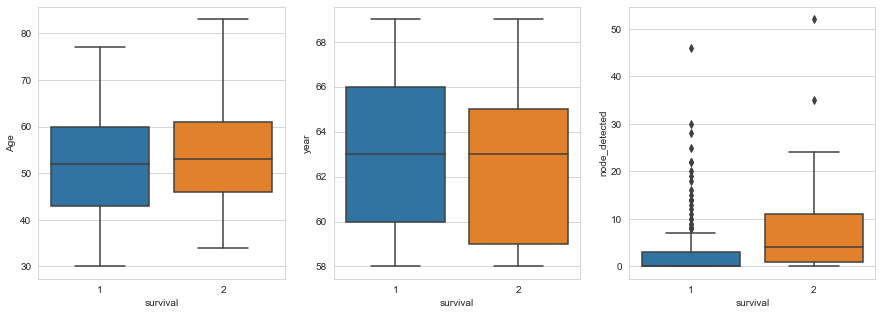

In [45]:
# BOX Plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx,feature in enumerate(list(haber.columns)[:-1]):
    sn.boxplot(x='survival',y=feature,data=haber,ax=axes[idx])
    
plt.show()


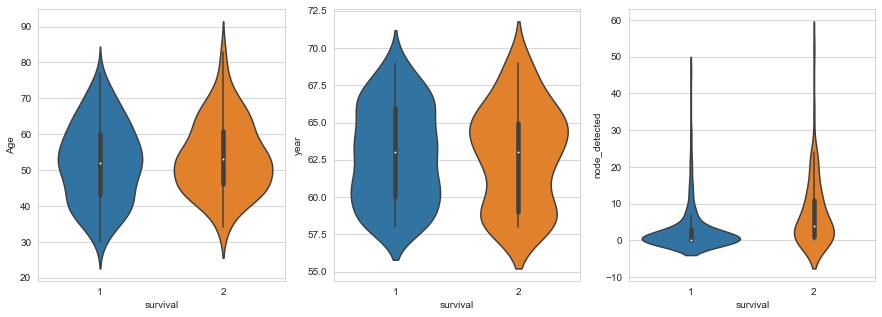

In [46]:
#Violine plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx,feature in enumerate(list(haber.columns)[:-1]):
    sn.violinplot(x='survival',y=feature,data=haber,ax=axes[idx])
    
plt.show()
